# <font color="red">RA - Qiskit Practice - Lecture 01</font>

## Import Library

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
from qiskit import *
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_qsphere, plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit_aer import AerSimulator

from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_provider.job import job_monitor

import numpy as np
import time

## Simple Cirucit

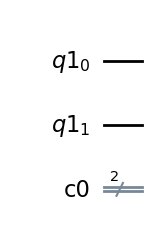

In [4]:
q = QuantumRegister(2)
c = ClassicalRegister(2)

qc = QuantumCircuit(q, c)

display(qc.draw("mpl"))

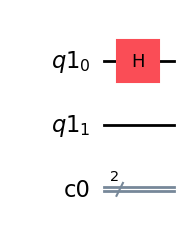

In [5]:
qc.h(0)
display(qc.draw("mpl"))

## Vector State

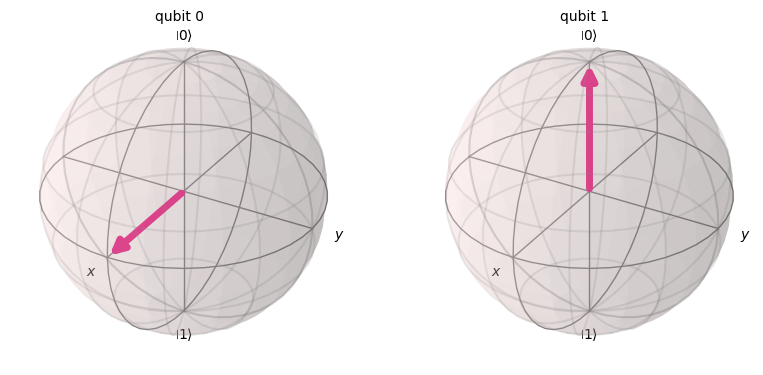

In [6]:
display(plot_bloch_multivector(qc))

## Quantum Sphere

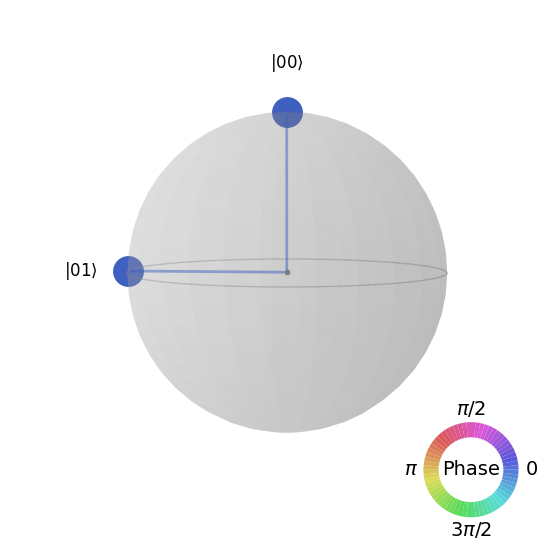

In [7]:
display(plot_state_qsphere(qc))

## Initializing Qubits

In [8]:
qc.initialize([1/np.sqrt(2), 1j/np.sqrt(2)], 1)

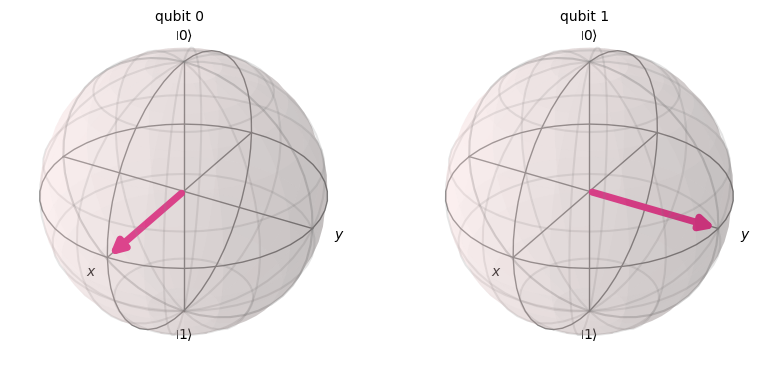

In [9]:
display(plot_bloch_multivector(qc))

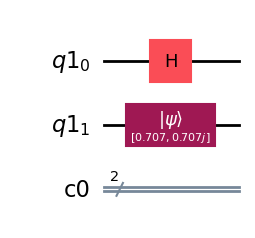

In [10]:
display(qc.draw("mpl"))

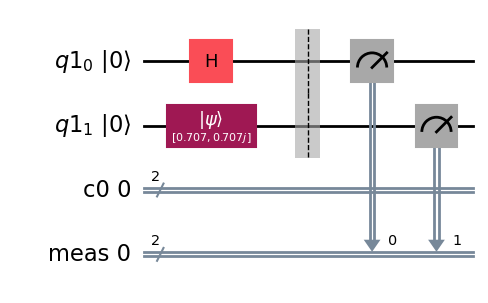

In [11]:
qc.measure_all()
qc.draw("mpl", initial_state=True)

## Run on Simulator

In [12]:
simulator = AerSimulator()

transpile_qc = transpile(qc, simulator)
job = simulator.run(transpile_qc)

results = job.result()
counts = results.get_counts()

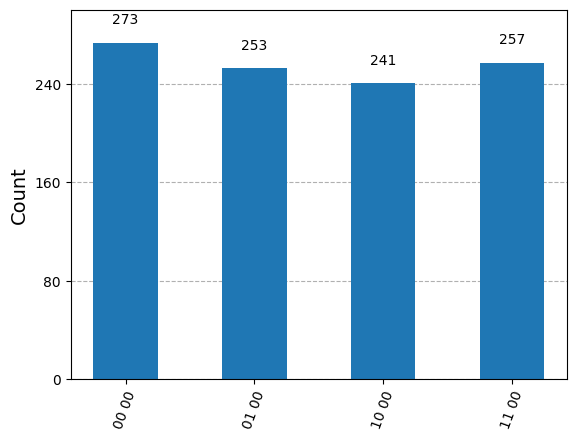

In [13]:
plot_histogram(counts)

## H Gate Matrix

In [14]:
from qiskit.circuit.library import HGate
hgate = HGate()
print(hgate.to_matrix())

[[ 0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j]]


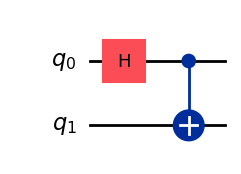

In [15]:
qc2 = QuantumCircuit(2)
qc2.h(0)
qc2.cx(0, 1)

qc2.draw("mpl")

## Construct Gate Manually

In [16]:
from sympy import *
from sympy.physics.quantum import TensorProduct

id = Matrix([[1, 0], [0, 1]])
x = Matrix([[0, 1], [1, 0]])
zero = Matrix([[1, 0], [0, 0]])
one = Matrix([[0, 0], [0, 1]])

hgate = I * |0><0| + X * |1><1|

In [17]:
ccx2 = TensorProduct(id, zero) + TensorProduct(x, one)
ccx2

Matrix([
[1, 0, 0, 0],
[0, 0, 0, 1],
[0, 0, 1, 0],
[0, 1, 0, 0]])

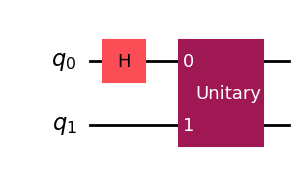

In [23]:
from qiskit.circuit.library import UnitaryGate

ccx2 = UnitaryGate(ccx2)

qc3 = QuantumCircuit(2)
qc3.h(0)
qc3.append(ccx2, [0, 1])

qc3.draw("mpl")

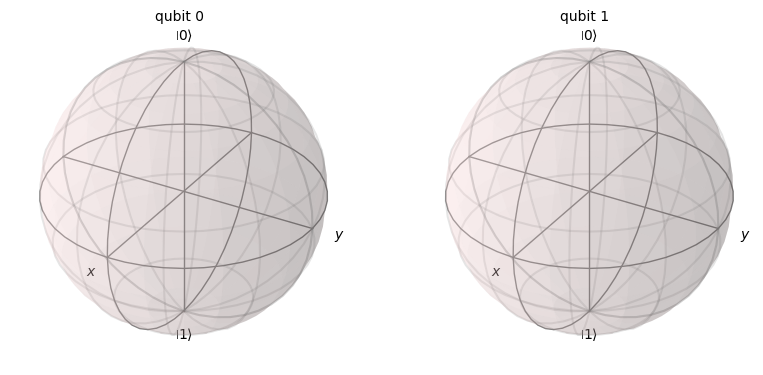

In [24]:
plot_bloch_multivector(qc3)

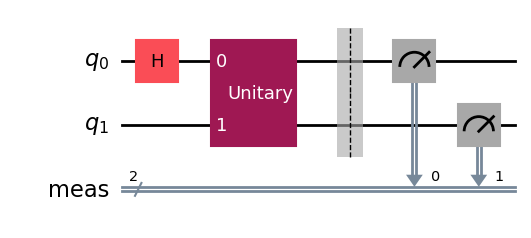

In [25]:
qc3.measure_all()

qc3.draw("mpl")

In [26]:
transpile_qc = transpile(qc3, simulator)
job = simulator.run(transpile_qc)

results = job.result()
counts = results.get_counts()

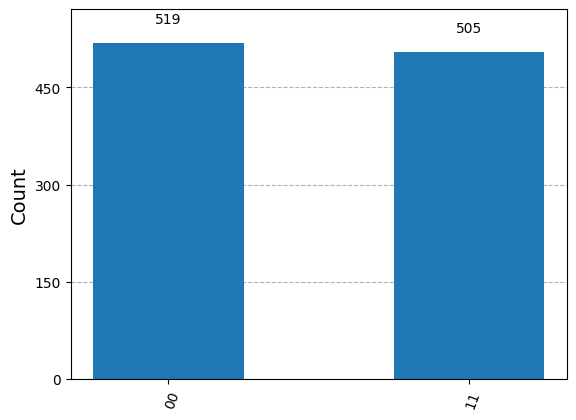

In [27]:
plot_histogram(counts)

## Construct H Gate Manually

In [28]:
cx2 = TensorProduct(id, zero) + TensorProduct(x, one)
hcx = TensorProduct(id, Matrix([[ 0.70710678+0.j,  0.70710678+0.j], [ 0.70710678+0.j, -0.70710678+0.j]])) * cx2
hcx2 = UnitaryGate(hcx)

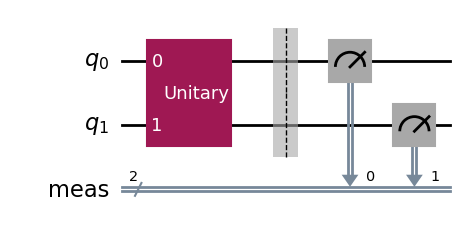

In [29]:
qc4 = QuantumCircuit(2)
qc4.append(hcx2, [0, 1])
qc4.measure_all()
qc4.draw("mpl")

In [30]:
transpile_qc = transpile(qc4, simulator)
job = simulator.run(transpile_qc)

results = job.result()
counts = results.get_counts()

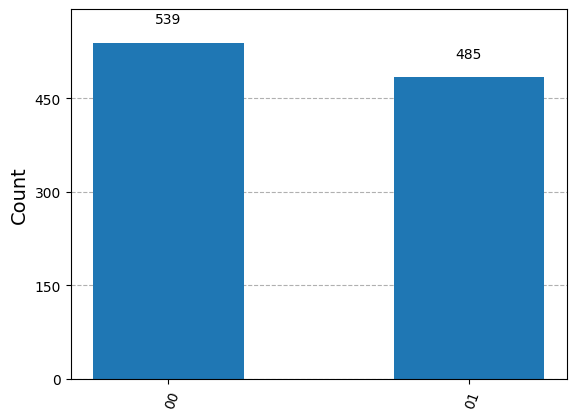

In [31]:
plot_histogram(counts)

## Run on Real Devices

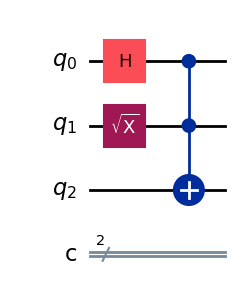

In [32]:
qc5 = QuantumCircuit(3, 2)
qc5.h(0)
qc5.sx(1)
qc5.ccx(0, 1, 2)

qc5.draw("mpl")

In [34]:
QiskitRuntimeService.save_account(channel="ibm_quantum", token="6ae40c57c3cbeb90728f448dacdf19cae71b887c1b90dede86ee5be508931274be73b8cb6c9a755a9afda3a704736e4c92be7eaf31ddc9ffdc1f7d66be82150f", overwrite=True, set_as_default=True)

#service = QiskitRuntimeService(channel="ibm_cloud")

service = QiskitRuntimeService(channel="ibm_quantum")

#service = QiskitRuntimeService()
backend = service.least_busy(simulator=False, operational=True, min_num_qubits=100)
print(backend)

<IBMBackend('ibm_sherbrooke')>


In [35]:
t_qc = transpile(qc5, backend=backend, optimization_level=3)

job = backend.run(t_qc)
while job.status().name != 'DONE':
    print(f"Job Status: {job.status().name}")
    time.sleep(10)  # Check status every 10 seconds

# Get the result once the job is done
result = job.result()
print(result)

Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: QUEUED
Job Status: 

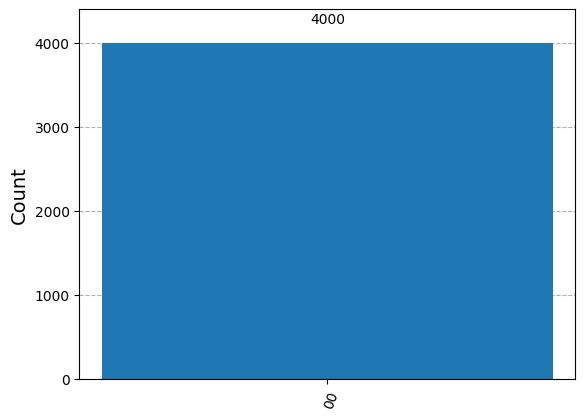

In [36]:
# get counts
counts = result.get_counts()

# plot histogram
plot_histogram(counts)